In [165]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [166]:
# load the data of dependent variables
vars = pd.read_csv('/Users/lacivert/3/vars.csv')

In [167]:
# Assign DataFrame
df = pd.DataFrame(vars)

In [168]:
# List column names to display the variables for anaylsis
list(df.columns.values)

['4 Jan 1999 - 27 July 2018',
 'EUR/USD',
 'GBP/USD',
 'AUD/USD',
 'USD/CAD',
 'USD/CHF',
 'SP500',
 'DGS10']

In [169]:
# Setting up exchange rate variables or the dependent variables 
EUR_USD, GBP_USD, AUD_USD, USD_CAD, USD_CHF = df.loc[:,'EUR/USD'],df.loc[:,'GBP/USD'],df.loc[:,'AUD/USD'],df.loc[:,'USD/CAD'],df.loc[:,'USD/CHF']

In [170]:
# sanity check on the number of values in each exchange rates 
len (EUR_USD), len (GBP_USD), len (AUD_USD), len (USD_CAD), len (USD_CHF)

(4885, 4885, 4885, 4885, 4885)

In [171]:
# Ensure all exchange rates are expressed the same way , i.e. in US Dollars . . . so need to flip these
USD_CAD.head(), USD_CHF.head()

(0   1.527
 1   1.521
 2   1.511
 3   1.512
 4   1.514
 Name: USD/CAD, dtype: float64, 0   1.367
 1   1.369
 2   1.385
 3   1.386
 4   1.397
 Name: USD/CHF, dtype: float64)

In [172]:
#  to flip the exchange rates divide with an array of ones
ones = np.ones_like(USD_CAD)

In [173]:
CAD_USD, CHF_USD = ones / USD_CAD, ones / USD_CHF

In [174]:
# sanity check
CAD_USD.head(), CHF_USD.head()

(0   0.655
 1   0.657
 2   0.662
 3   0.662
 4   0.660
 Name: USD/CAD, dtype: float64, 0   0.732
 1   0.730
 2   0.722
 3   0.721
 4   0.716
 Name: USD/CHF, dtype: float64)

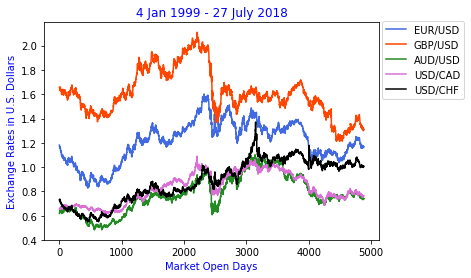

In [175]:
plt.plot (EUR_USD,color='royalblue')
plt.plot (GBP_USD,color='orangered')
plt.plot (AUD_USD,color='forestgreen')
plt.plot (CAD_USD,color='orchid')
plt.plot (CHF_USD,color='k')
plt.xlabel ('Market Open Days', color='blue')
plt.ylabel ('Exchange Rates in U.S. Dollars', color='blue')
plt.title ('4 Jan 1999 - 27 July 2018', color='blue')
plt.legend(bbox_to_anchor=(1.27, 1.03))

In [176]:
len(EUR_USD), len(GBP_USD), len(AUD_USD), len(USD_CAD), len(USD_CHF), len(CAD_USD), len(CHF_USD)

(4885, 4885, 4885, 4885, 4885, 4885, 4885)

In [177]:
df2 = pd.DataFrame(data=[EUR_USD,GBP_USD,AUD_USD,CAD_USD,CHF_USD])

In [178]:
df2.reset_index()

,index,0,1,2,3,4,5,6,7,8,...,4875,4876,4877,4878,4879,4880,4881,4882,4883,4884
0,EUR/USD,1.181,1.176,1.164,1.167,1.155,1.153,1.155,1.170,1.169,...,1.171,1.166,1.165,1.160,1.171,1.170,1.168,1.168,1.165,1.166
1,GBP/USD,1.658,1.657,1.655,1.649,1.641,1.637,1.631,1.649,1.653,...,1.324,1.316,1.305,1.299,1.311,1.310,1.313,1.315,1.312,1.312
2,AUD/USD,0.618,0.622,0.628,0.634,0.633,0.639,0.640,0.631,0.631,...,0.742,0.739,0.739,0.733,0.741,0.738,0.742,0.741,0.738,0.741
3,USD/CAD,0.655,0.657,0.662,0.662,0.660,0.663,0.662,0.654,0.654,...,0.762,0.758,0.757,0.754,0.760,0.760,0.760,0.763,0.765,0.766
4,USD/CHF,0.732,0.730,0.722,0.721,0.716,0.716,0.720,0.736,0.734,...,1.003,1.001,1.001,0.998,1.006,1.007,1.006,1.006,1.006,1.006


In [179]:
df2.transpose()

,EUR/USD,GBP/USD,AUD/USD,USD/CAD,USD/CHF
0,1.181,1.658,0.618,0.655,0.732
1,1.176,1.657,0.622,0.657,0.730
2,1.164,1.655,0.628,0.662,0.722
3,1.167,1.649,0.634,0.662,0.721
4,1.155,1.641,0.633,0.660,0.716
5,1.153,1.637,0.639,0.663,0.716
6,1.155,1.631,0.640,0.662,0.720
7,1.170,1.649,0.631,0.654,0.736
8,1.169,1.653,0.631,0.654,0.734
9,1.159,1.650,0.634,0.654,0.725


In [180]:
USD_df = df2.transpose()

In [181]:
USD_df.rename (columns={'USD/CAD' : 'CAD/USD'}, inplace=True)

In [182]:
USD_df.rename (columns={'USD/CHF' : 'CHF/USD'}, inplace=True)

In [183]:
USD_df.head()

,EUR/USD,GBP/USD,AUD/USD,CAD/USD,CHF/USD
0,1.181,1.658,0.618,0.655,0.732
1,1.176,1.657,0.622,0.657,0.730
2,1.164,1.655,0.628,0.662,0.722
3,1.167,1.649,0.634,0.662,0.721
4,1.155,1.641,0.633,0.660,0.716


In [184]:
# Setting up the correlation matrix heatmap
corr = USD_df.corr()

In [185]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

Text(0.5,1,'Python Data Visualzation of a Correlation Matrix Heatmap:  \nSome of the Most Traded Currencies in the World from 4 Jan 1999 to 27 July 2018\nAll Daily Exchange Rates expressed in US Dollars')

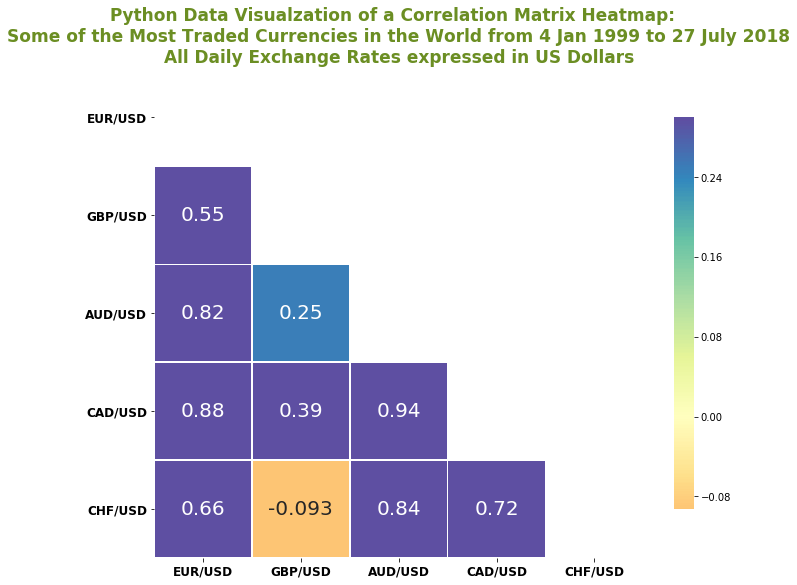

In [186]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Spectral', vmax=.3, center=0, annot_kws={"size": 20}, 
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.yticks(rotation=0, fontweight='bold', fontsize=12)
plt.xticks(fontweight='bold', fontsize=12)
plt.title('Python Data Visualzation of a Correlation Matrix Heatmap:  \nSome of the Most Traded Currencies in the World from 4 Jan 1999 to 27 July 2018\nAll Daily Exchange Rates expressed in US Dollars',
          fontweight='bold', fontsize=17,color='olivedrab')


In [187]:
# load the data of independent variables
equity_index, bond_index = df.loc[:,'SP500'], df.loc[:,'DGS10']

In [188]:
len(equity_index), len(bond_index), len(EUR_USD), len(GBP_USD), len (AUD_USD), len (USD_CAD), len (USD_CHF)

(4885, 4885, 4885, 4885, 4885, 4885, 4885)

In [189]:
USD_df.tail()

,EUR/USD,GBP/USD,AUD/USD,CAD/USD,CHF/USD
4880,1.170,1.310,0.738,0.760,1.007
4881,1.168,1.313,0.742,0.760,1.006
4882,1.168,1.315,0.741,0.763,1.006
4883,1.165,1.312,0.738,0.765,1.006
4884,1.166,1.312,0.741,0.766,1.006


In [190]:
USD_df = USD_df.assign(equity_index=equity_index, bond_index=bond_index)

In [191]:
USD_df.tail()

,EUR/USD,GBP/USD,AUD/USD,CAD/USD,CHF/USD,equity_index,bond_index
4880,1.170,1.310,0.738,0.760,1.007,2806.980,2.960
4881,1.168,1.313,0.742,0.760,1.006,2820.400,2.950
4882,1.168,1.315,0.741,0.763,1.006,2846.070,2.940
4883,1.165,1.312,0.738,0.765,1.006,2837.440,2.980
4884,1.166,1.312,0.741,0.766,1.006,2818.820,2.960


In [205]:
r = linear_model.LinearRegression()
Y = df['EUR/USD']
X = df[['SP500', 'DGS10']]
regr.fit(X, Y)

# Inspect the results with the first currency exchange rate the Euro
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [-0.00011311 -0.06944921]

Intercept: 
 1.6256388510814124

R-squared:
0.22188356144235488


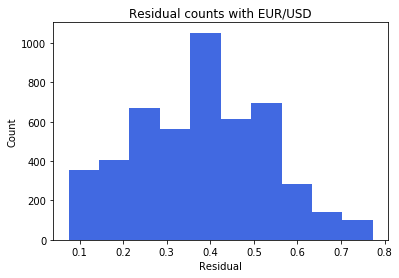

In [212]:
predicted = regr.predict(X).ravel()
actual = USD_df['EUR/USD']

residual = actual - predicted

plt.hist(residual, color='royalblue')
plt.title('Residual counts with EUR/USD')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

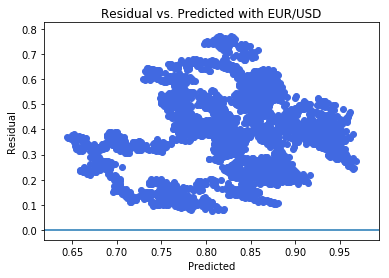

In [213]:
plt.scatter(predicted, residual,color='royalblue')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted with EUR/USD')
plt.show()

In [195]:
correlation_matrix = X.corr()
display(correlation_matrix)

,SP500,DGS10
SP500,1.000,-0.475
DGS10,-0.475,1.000


In [196]:
r = linear_model.LinearRegression()
Y = df['GBP/USD']
X = df[['SP500', 'DGS10']]
regr.fit(X, Y)

# Inspect the results with the second currency exchange rate the British Pound 
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [-0.00013503  0.028195  ]

Intercept: 
 1.7073193862697968

R-squared:
0.20686460546972393


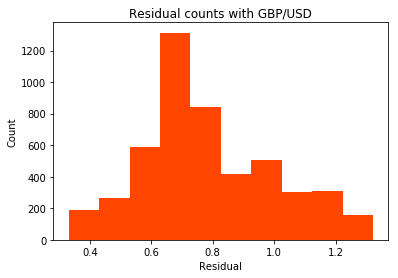

In [214]:
predicted = regr.predict(X).ravel()
actual = USD_df['GBP/USD']

residual = actual - predicted

plt.hist(residual, color='orangered')
plt.title('Residual counts with GBP/USD')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

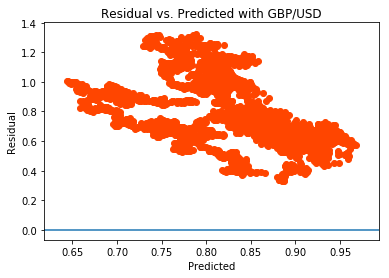

In [216]:
plt.scatter(predicted, residual,color='orangered')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted with GBP/USD')
plt.show()

In [217]:
r = linear_model.LinearRegression()
Y = df['AUD/USD']
X = df[['SP500', 'DGS10']]
regr.fit(X, Y)

# Inspect the results with the third currency exchange rate the Australian Dollar
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [-5.48417693e-05 -8.02574018e-02]

Intercept: 
 1.149876896946223

R-squared:
0.3925910323233447


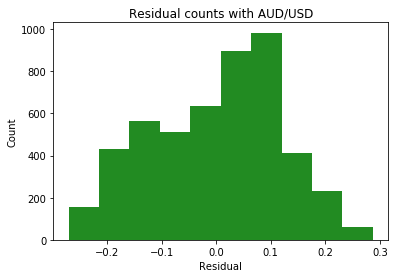

In [218]:
predicted = regr.predict(X).ravel()
actual = USD_df['AUD/USD']

residual = actual - predicted

plt.hist(residual,color='forestgreen')
plt.title('Residual counts with AUD/USD')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

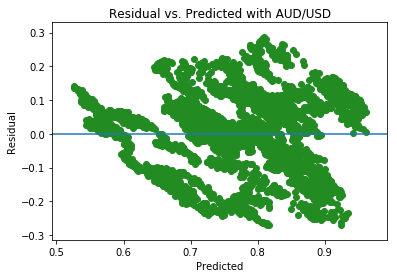

In [219]:
plt.scatter(predicted, residual, color='forestgreen')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted with AUD/USD')
plt.show()

In [220]:
r = linear_model.LinearRegression()
Y = USD_df['CAD/USD']
X = df[['SP500', 'DGS10']]
regr.fit(X, Y)

# Inspect the results with the fourth currency exchange rate the Canadian Dollar
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [-7.50628136e-05 -5.83696206e-02]

Intercept: 
 1.1493258655091865

R-squared:
0.28549512227244833


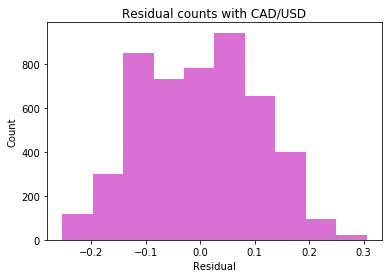

In [221]:
predicted = regr.predict(X).ravel()
actual = USD_df['CAD/USD']

residual = actual - predicted

plt.hist(residual, color='orchid')
plt.title('Residual counts with CAD/USD')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

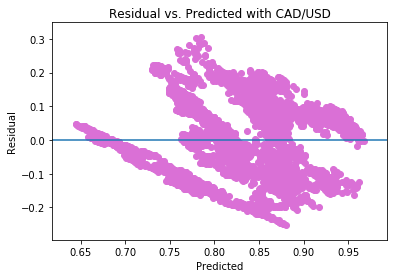

In [222]:
plt.scatter(predicted, residual,color='orchid')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted with CAD/USD')
plt.show()

In [223]:
r = linear_model.LinearRegression()
Y = USD_df['CHF/USD']
X = df[['SP500', 'DGS10']]
regr.fit(X, Y)

# Inspect the results with the fourth currency exchange rate the Canadian Dollar
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 3.92865105e-05 -1.10443298e-01]

Intercept: 
 1.2276935528380606

R-squared:
0.7706149977591958


In [ ]:
predicted = regr.predict(X).ravel()
actual = USD_df['CAD/USD']

residual = actual - predicted

plt.hist(residual, color='orchid')
plt.title('Residual counts with CAD/USD')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()